# **Stock price prediction using LSTM**

**Member**

m5271046 Yuki Tome

m5271022 Yusuke Matsushima


**Introduction**

LSTM is used to forecast stock prices. LSTM was developed to solve the vanishing gradient problem or exploding gradient problem of RNNs.

**Problem statement**

Data is obtained from Yahoo Finance for Amazon stock price data.
Training is done on 80% of the data set and validation is done on the remaining 20% of the data set. It is expected that the results from the validation will be approximately the same value as the test data set.

**Technical Approach and Models**

LSTM is a type of RNN that was developed to solve the vanishing gradient problem of RNNs. It is designed to have the ability to learn dependencies over long time scales. LSTM replaces the hidden layer neurons of RNNs with a special structure called a "memory cell".

LSTM is designed to solve this problem. At its core is a concept called "cell state," which is like a "transport path" of information through the network. In LSTM, there are three gates

1. Forget Gate: This gate determines which information is forgotten (deleted).
2. Input Gate: This gate determines how much new information is stored in the cell state.
3. Output Gate: This gate determines which information in the cell state is used as output.

All of these gates output values between 0 and 1 using a sigmoidal function. This controls how much information each gate allows through (close to 1) or does not allow through (close to 0).

Model performance is evaluated using root mean square error (RMSE) and coefficient of determination (R^2).

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
s_target = 'AMZN'
df = pdr.get_data_yahoo(s_target, start='2014-01-01', end=datetime.now())
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


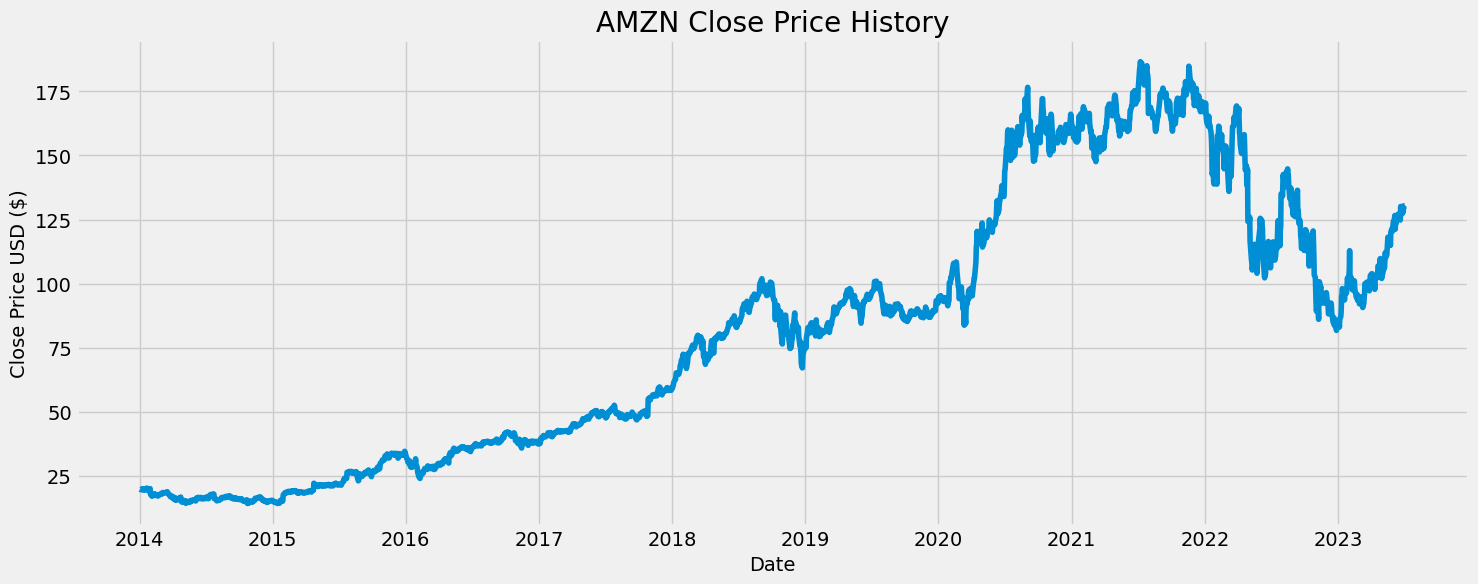

In [ ]:
plt.figure(figsize=(16,6))
plt.title(s_target + ' Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [ ]:
# Data of Close
data = df.filter(['Close'])
dataset = data.values

# Normalize data to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03223147],
       [0.03178728],
       [0.03097147],
       ...,
       [0.67361795],
       [0.67280505],
       [0.6737341 ]])

In [ ]:
# 80% of the total data is treated as training data
training_data_len = int(np.ceil( len(dataset) * .8 ))

In [ ]:
# Based on how long do you want to forecast?
window_size = 60

train_data = scaled_data[0:int(training_data_len), :]

# Separate train_data into x_train and y_train
x_train, y_train = [], []
for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
58/58 [==============================] - 18s 17ms/step - loss: 0.0132
Epoch 2/100
58/58 [==============================] - 1s 18ms/step - loss: 0.0032
Epoch 3/100
58/58 [==============================] - 1s 17ms/step - loss: 0.0031
Epoch 4/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 5/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 6/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0027
Epoch 7/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 8/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 9/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0019
Epoch 10/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 11/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 12/100
58/58 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 13/100
58/58 [====

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
# Create test data
test_data = scaled_data[training_data_len - window_size: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

# Convert to numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Perform prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Root mean square error (RMSE): the closer to 0, the better
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

# Coefficient of determination (r2) : The closer to 1, the better
r2s = r2_score(y_test, predictions)
print(r2s)

15/15 [==============================] - 1s 8ms/step
7.117305827383403
0.9402669943430119


<ipython-input-11-a45024e09557>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


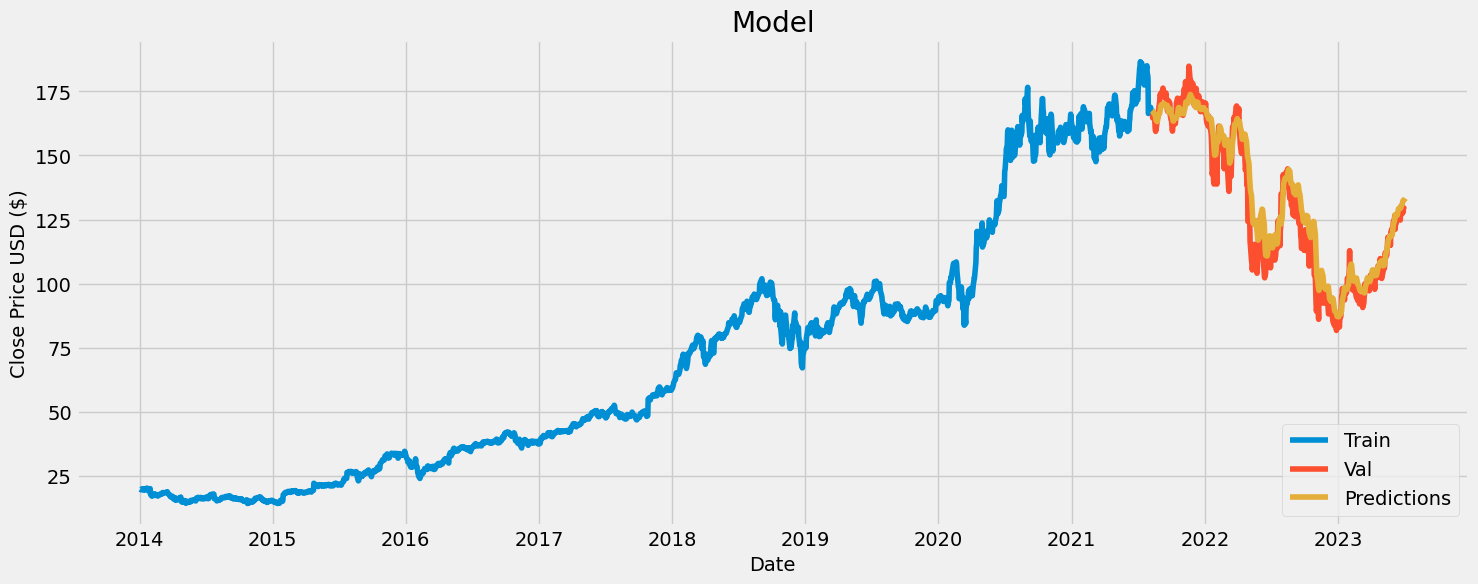

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**Experiments & Results**

The results of the model evaluation are as follows.

RMSE: 5.4511434989704215

R^2: 0.9649604643276736

The range of values for the training data is roughly 180, so the RMSE value of 5.45 is not that large, and the coefficient of determination is 0.96, so the performance of the model can be evaluated as high. Also, as can be seen from the graph above, the model is doing a good prediction.